# Защита персональных данных клиентов

**Задача:** Разработать алгоритм преобразования данных для шифрования персональной информации клиентов страховой компании.

**План проекта:**

1. Обзор данных
2. Алгоритм преобразования
3. Проверка алгоритма

## Обзор данных

In [1]:
# импортируем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
try:
    df = pd.read_csv('/datasets/insurance.csv')
except:
    df = pd.read_csv('https://datasets/insurance.csv')
df.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [4]:
df.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


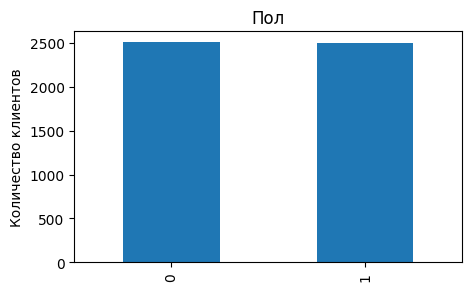

In [5]:
df['Пол'].value_counts().plot(kind='bar', figsize=(5,3))
plt.title("Пол")
plt.ylabel("Количество клиентов")
plt.show();

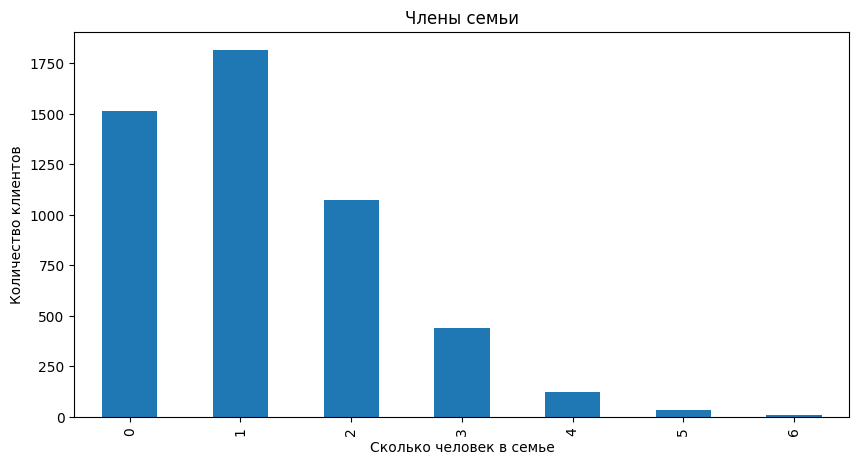

In [6]:
df['Члены семьи'].value_counts().sort_index().plot(kind='bar', figsize=(10,5))
plt.title("Члены семьи")
plt.xlabel("Сколько человек в семье")
plt.ylabel("Количество клиентов")
plt.show();

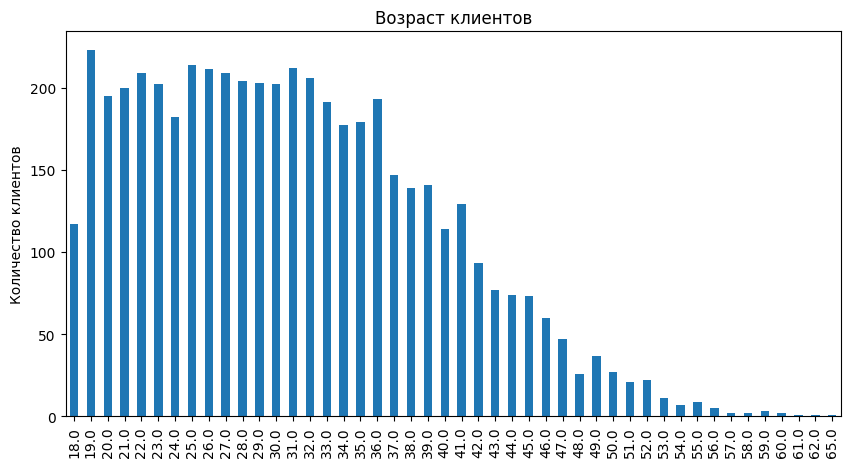

In [7]:
df['Возраст'].value_counts().sort_index().plot(kind='bar', figsize=(10,5))
plt.title("Возраст клиентов")
plt.ylabel("Количество клиентов")
plt.show();

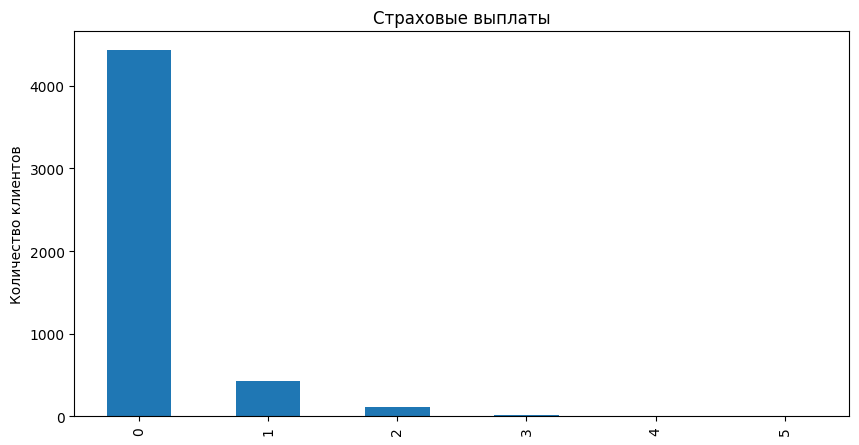

In [8]:
df['Страховые выплаты'].value_counts().plot(kind='bar', figsize=(10,5))
plt.title("Страховые выплаты")
plt.ylabel("Количество клиентов")
plt.show();

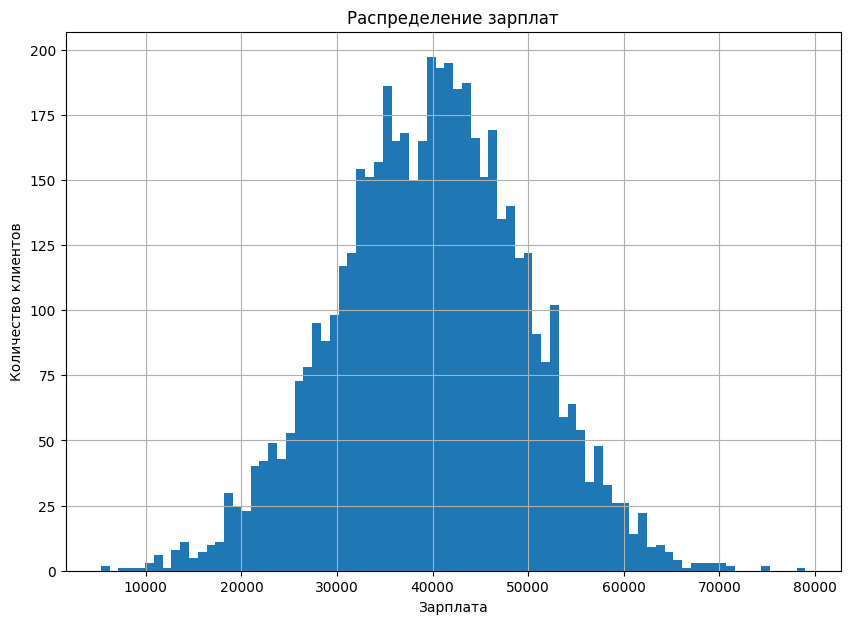

In [9]:
df['Зарплата'].hist(bins=80, figsize=(10,7))
plt.title("Распределение зарплат")
plt.xlabel("Зарплата")
plt.ylabel("Количество клиентов")
plt.show();

In [10]:
# меняем тип данных
df['Возраст'] = df['Возраст'].astype(int)
df['Зарплата'] = df['Зарплата'].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Пол                5000 non-null   int64
 1   Возраст            5000 non-null   int32
 2   Зарплата           5000 non-null   int32
 3   Члены семьи        5000 non-null   int64
 4   Страховые выплаты  5000 non-null   int64
dtypes: int32(2), int64(3)
memory usage: 156.4 KB


**Вывод:** В данных нет проспусков и явных аномалий. В столбце "Возраст" нужно завенить тип на целое число, также можно для удобства поменять тип у столбца "Зарплата". "Пол" выражен в виде 0 и 1 в равном соотношении. Распределение зарплат похоже на нормальное, средняя зарбплата 40 000 рублей. Средний возраст клиентов 30 лет, значительное количество тех, кто находится в промежутке младше 20 - 30. Преимущественно  это люди, у которых есть хотя бы один родственник, либо одинокие. Подавляющее большинство не получало никаких страховых выплат. 

## Умножение матриц

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Вопрос:** Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии?

**Ответ:** Не изменится.

**Обоснование:** 

**Шаг 1** 

Есть матрица M = XP, значит $$ a_i = Mw $$ $$ w_i = (M^TM)^{-1}M^Ty $$

**Шаг 2**

Подставим значение матрицы M в формулу обучения:

$$
w_i = ((XP)^TXP)^{-1}(XP)^Ty
$$

**Шаг 3**

Раскроем скобки, применив свойство $$(AB)^T = B^TA^T$$

Получим:

$$
w_i = (P^TX^TXP)^{-1}P^TX^Ty
$$

**Шаг 4**

Теперь применим свойство $$(AB)^{-1} = B^{-1}A^{-1}$$

Получим:

$$
w_i = (P^T(X^TX)P)^{-1}P^TX^Ty
$$

$$
w_i = P^{-1}(P^T(X^TX))^{-1}P^TX^Ty
$$

$$
w_i = P^{-1}(X^TX)^{-1}(P^T)^{-1}P^TX^Ty
$$

**Шаг 5**

Применим следующее свойство $$AA^{-1} = A^{-1}A = E$$

Тогда получается, что:

$$
(P^T)^{-1}P^T = E
$$

И формула будет выглядеть так:

$$
w_i = P^{-1}(X^TX)^{-1}X^Ty
$$

**Шаг 6**

Знаем, что $$(X^TX)^{-1}X^Ty = w$$

Тогда формула обучения для матрицы M:

$$
w_i = P^{-1}w
$$

А формула предсказания такая:

$$
a_i = XPP^{-1}w
$$

**Шаг 7**

В итоге получим, что

$$
PP^{-1} = E
$$

$$
a_i = Xw
$$

$$
a_i = a
$$

**Вывод:** Умножение признаков на обратимую матрицу не меняет качества линейной регрессии.

## Алгоритм преобразования

**Алгоритм**

1. Создать ключ шифрования - сгенерируем случайную квадратную матрицу
2. Умножение исходной матрицы на ключ шифрования

**Обоснование**

Для защиты данных зашифруем их, умножив исходную матрицу признаков на обратимую матрицу. Из приведенного выше доказательства следует, что качество модели не поменяется.

## Проверка алгоритма

Сделаем следующее: 
* Напишем функцию для преобразования данных
* Обучим модель линейной регрессии на исходным данных и найдем R2
* Создадим случаную квадратную матрицу и проверим ее на обратимость
* Снова обучим модель уже на преобразованных данных и найдем R2
* Сравним полученные показатели качества моделей и сделаем вывод

In [11]:
# выделим признаки
features = df.drop('Страховые выплаты', axis=1)
target = df['Страховые выплаты']

# выделим тестовую выборку
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.25, random_state=12345)

print(features_train.shape, target_train.shape)
print(features_test.shape, target_test.shape)

(3750, 4) (3750,)
(1250, 4) (1250,)


In [12]:
P = np.random.normal(0, 1, (features.shape[1], features.shape[1]))

# функция для преобразования данных
def new_features(features):
    X = features.values
    #M = X.shape[1]
    #P = np.random.rand(M, M)
    det = np.linalg.det(P)
    if det > 0.01:
        new_X = X @ P
        return new_X

In [13]:
# ДО преобразования
model_1 = LinearRegression()
model_1.fit(features_train, target_train)
predictions_1 = model_1.predict(features_test)
accuracy_1 = r2_score(target_test, predictions_1)
print('Качество модели ДО преобразования', accuracy_1)

Качество модели ДО преобразования 0.4352275684083253


In [14]:
# ПОСЛЕ преобразования
features_2 = new_features(features)
features_train_2, features_test_2, target_train_2, target_test_2 = train_test_split(
    features_2, target, test_size=0.25, random_state=12345)

model_2 = LinearRegression()
model_2.fit(features_train_2, target_train_2)
predictions_2 = model_2.predict(features_test_2)
accuracy_2 = r2_score(target_test_2, predictions_2)
print('Качество модели ПОСЛЕ преобразования', accuracy_2)

Качество модели ПОСЛЕ преобразования 0.4352275684087187


In [15]:
features.head()

,Пол,Возраст,Зарплата,Члены семьи
0,1,41,49600,1
1,0,46,38000,1
2,0,29,21000,0
3,0,21,41700,2
4,1,28,26100,0


In [16]:
decode_X = features_2 @ np.linalg.inv(P)
round(pd.DataFrame(decode_X)).head()

,0,1,2,3
0,1.0,41.0,49600.0,1.0
1,-0.0,46.0,38000.0,1.0
2,0.0,29.0,21000.0,-0.0
3,-0.0,21.0,41700.0,2.0
4,1.0,28.0,26100.0,-0.0


**Вывод:** Алгоритм проверен, данные зашифрованы. Качество моделей до и после преобразования совпали.

## Общий вывод

* Данные выгружены и проверены. Пропусков и аномалий не найдено.
* Исследован вопрос об изменении качества линейной регрессии при умножении матрицы признаков на обратимую матрицу. Дан ответ и приведено доказательство. Качество не изменится.
* Предложен алгоритм пеобразования данных, для их защиты - умножение данных признаков на ключ шифрования, который представляет собой случаную квадратную обратимую матрицу.
* Предложенный метод проверен с помощью обучения моделей линейно регрессии. Качество моделей до и после преобразования признаков совпали, данные зашифрованы.